https://gglasso.readthedocs.io/en/latest/index.html

In [185]:
# !pip install gglasso

In [186]:
# !pip install decorator==5.0.9

In [187]:
from gglasso.helper.data_generation import generate_precision_matrix, group_power_network, sample_covariance_matrix
from gglasso.problem import glasso_problem
from gglasso.helper.basic_linalg import adjacency_matrix

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import pandas as pd

import yfinance as yf


In [188]:
# p = 20
# N = 1000

# Sigma, Theta = generate_precision_matrix(p=p, M=1, style='erdos', prob=0.1, seed=1234)

# S, sample = sample_covariance_matrix(Sigma, N)

# print("Shape of empirical covariance matrix: ", S.shape)
# print("Shape of the sample array: ", sample.shape)

In [189]:
# Read Data
tickers = ['ADANIENT.NS','RELIANCE.NS',"IBREALEST.NS",'IEX.NS']
start = '2010-01-01'
end = '2021-12-21'
source = 'yahoo'
test = yf.download(tickers,start=start,end=end)["Close"]

# getting the month end prices
test = test.resample('M').last()

[*********************100%***********************]  4 of 4 completed


In [190]:
X = test.pct_change().dropna()

In [191]:
# X = np.log(test)/np.log(test.shift(1)).dropna()

In [192]:
X

,ADANIENT.NS,IBREALEST.NS,IEX.NS,RELIANCE.NS
Date,,,,
2017-11-30,0.108088,-0.054295,-0.012997,-0.020513
2017-12-31,0.134720,0.050824,0.049542,-0.000543
2018-01-31,0.281635,-0.034035,-0.005466,0.043700
2018-02-28,-0.045263,-0.001623,-0.088774,-0.007022
2018-03-31,-0.231638,-0.157418,0.098554,-0.075271
2018-04-30,0.054781,0.186002,0.006769,0.091311
2018-05-31,-0.136331,-0.125929,-0.021967,-0.043548
2018-06-30,-0.064876,-0.168527,0.051606,0.055462
2018-07-31,0.727353,-0.030690,-0.036240,0.219600


In [193]:
# Covariance Matrix
Sigma = np.cov(X.T)
Sigma.shape

(4, 4)

In [194]:
# Inverse of covariance Matrix
Theta = np.linalg.inv(Sigma)
Theta,Theta.shape

(array([[ 30.0860816 ,  -6.3299823 ,  -7.75078563, -12.7903567 ],
        [ -6.3299823 ,  28.8890109 , -26.26706098,  -7.72567627],
        [ -7.75078563, -26.26706098, 148.22167879, -23.34021481],
        [-12.7903567 ,  -7.72567627, -23.34021481, 136.48405079]]),
 (4, 4))

In [195]:
# number of features
N = X.shape[0]
N

50

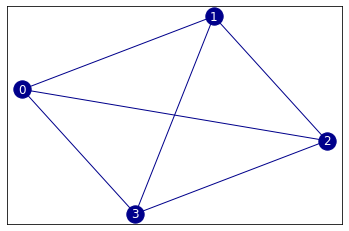

In [196]:
A = adjacency_matrix(Theta)

G = nx.from_numpy_array(A)
pos = nx.drawing.layout.spring_layout(G)

plt.figure()
nx.draw_networkx(G, pos = pos, node_color = "darkblue", edge_color = "darkblue", font_color = 'white', with_labels = True)

In [197]:
A

array([[0, 1, 1, 1],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 0]])

In [226]:
P = glasso_problem(Sigma, N, reg_params = {'lambda1': 0.00001}, latent = False, do_scaling = False)
print(P)

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 1e-05, 'mu1': None}


In [227]:
lambda1_range = np.logspace(0, -3, 30)
modelselect_params = {'lambda1_range': lambda1_range}

P.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.1)

# regularization parameters are set to the best ones found during model selection
print(P.reg_params)

ADMM terminated after 15 iterations with status: optimal.
ADMM terminated after 16 iterations with status: optimal.
ADMM terminated after 322 iterations with status: optimal.
ADMM terminated after 446 iterations with status: optimal.
ADMM terminated after 455 iterations with status: optimal.
ADMM terminated after 212 iterations with status: optimal.
ADMM terminated after 298 iterations with status: optimal.
ADMM terminated after 314 iterations with status: optimal.
ADMM terminated after 370 iterations with status: optimal.
ADMM terminated after 19 iterations with status: optimal.
ADMM terminated after 19 iterations with status: optimal.
ADMM terminated after 19 iterations with status: optimal.
{'lambda1': 0.0020433597178569417, 'mu1': 0}


Text(0.5, 1.0, 'Recovered precision matrix')

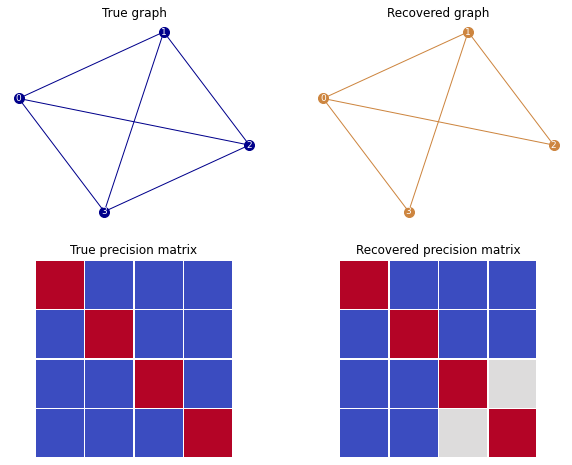

In [228]:
#tmp = P.modelselect_stats
sol = P.solution.precision_
P.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2,2, figsize=(10,8))
node_size = 100
font_size = 9

nx.draw_networkx(G, pos = pos, node_size = node_size, node_color = "darkblue", edge_color = "darkblue", \
                 font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0,0])
axs[0,0].axis('off')
axs[0,0].set_title("True graph")

G1 = nx.from_numpy_array(P.solution.adjacency_)
nx.draw_networkx(G1, pos = pos, node_size = node_size, node_color = "peru", edge_color = "peru", \
               font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0,1])
axs[0,1].axis('off')
axs[0,1].set_title("Recovered graph")

sns.heatmap(Theta, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,0])
axs[1,0].set_title("True precision matrix")

sns.heatmap(sol, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,1])
axs[1,1].set_title("Recovered precision matrix")

# Minimum Variance Portfolio

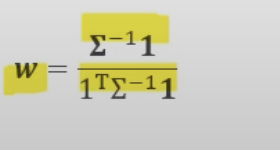

In [229]:
sol.shape

(4, 4)

In [230]:
sol

array([[ 28.03029358,  -6.21845877,  -4.8700492 ,  -8.38563365],
       [ -6.21845877,  26.19565838, -20.55757397,  -7.63357538],
       [ -4.8700492 , -20.55757397, 127.62433834,  -0.        ],
       [ -8.38563365,  -7.63357538,  -0.        , 122.40685551]])

In [231]:
num_arr = np.array([1,1,1,1])

In [232]:
num = np.matmul(sol,num_arr)
num

array([  8.55615196,  -8.21394973, 102.19671517, 106.38764648])

In [233]:
den = np.matmul(num_arr.T,num)

In [234]:
den

208.92656387800005

In [235]:
num/den

array([ 0.04095292, -0.03931501,  0.48915137,  0.50921072])

In [236]:
sum(num/den)

1.0

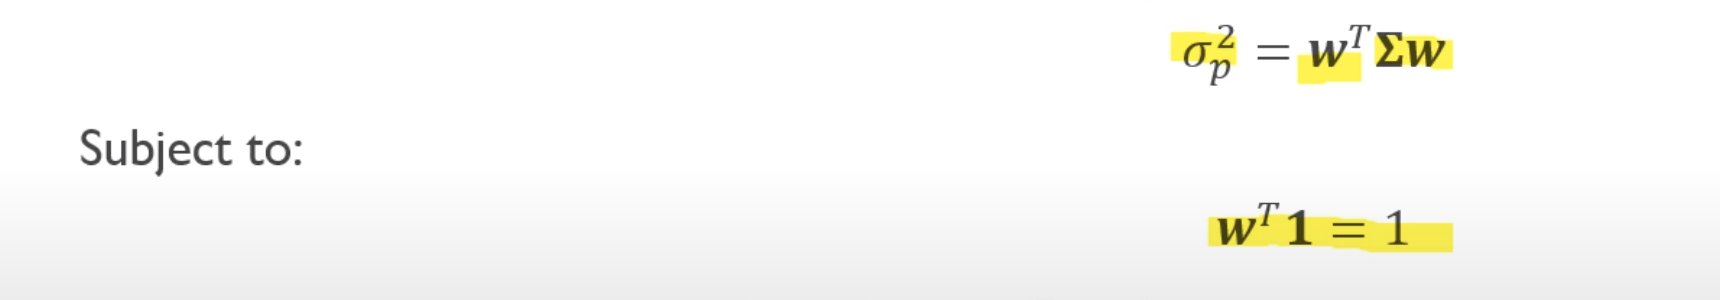

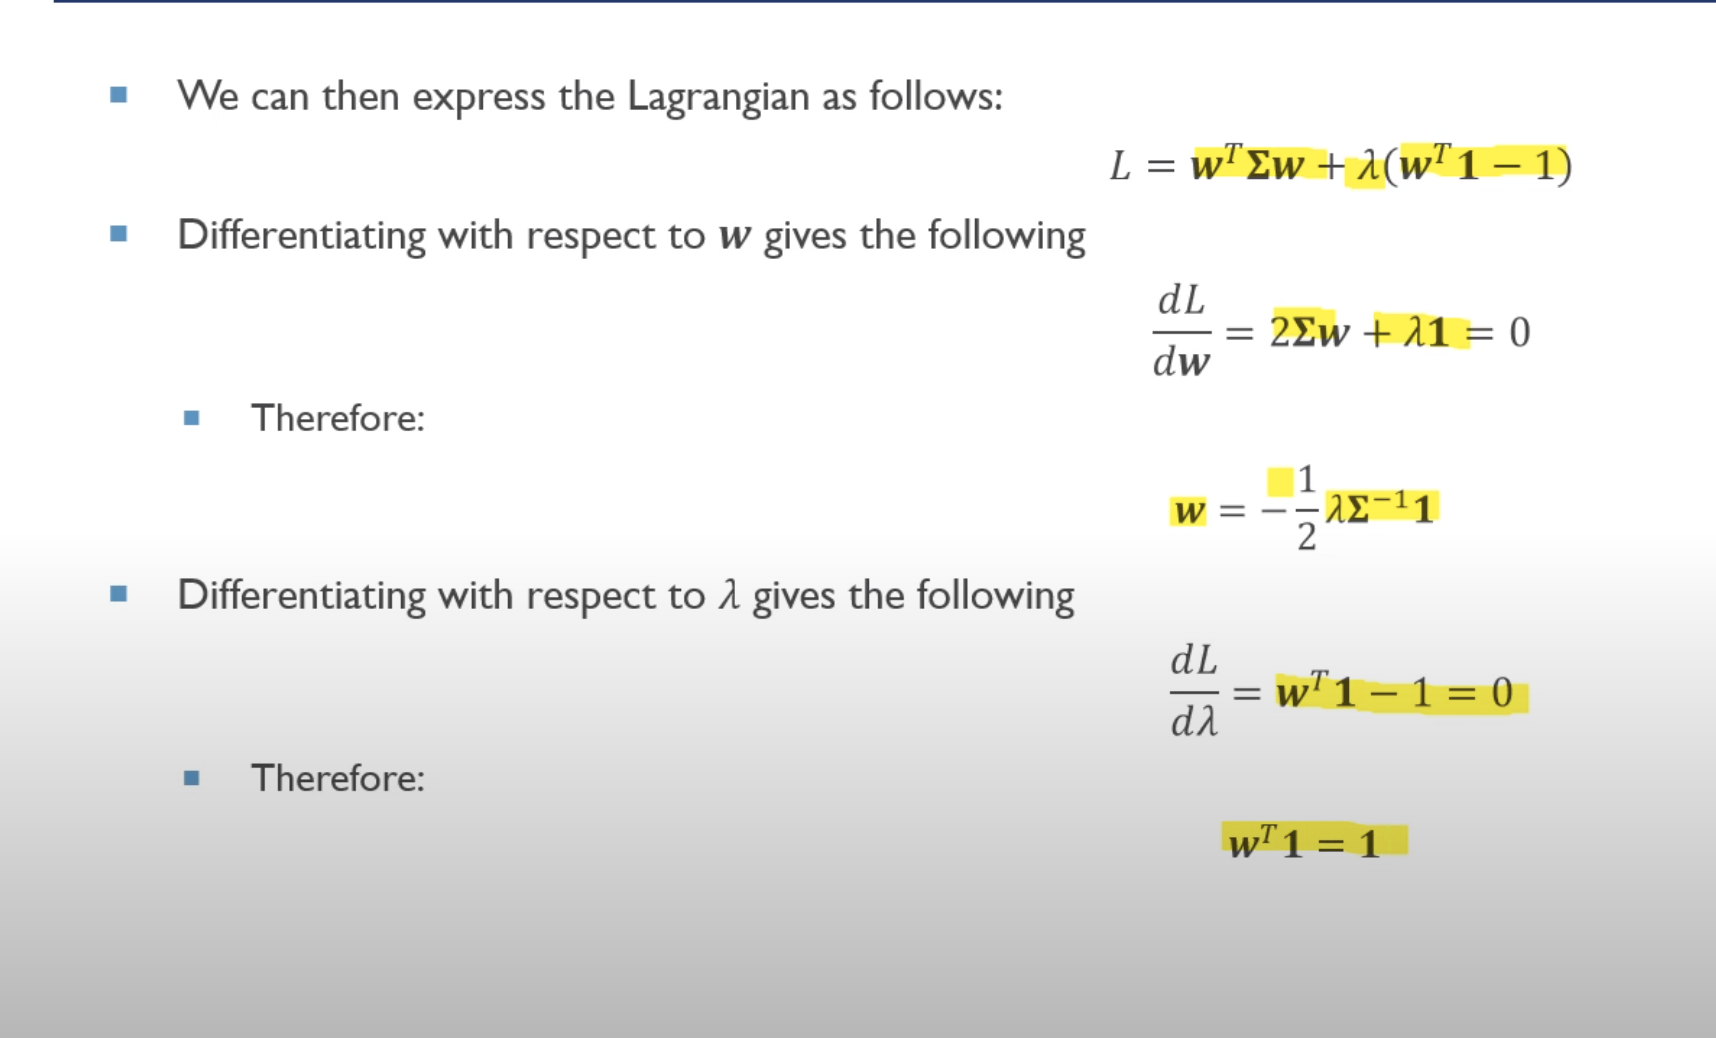

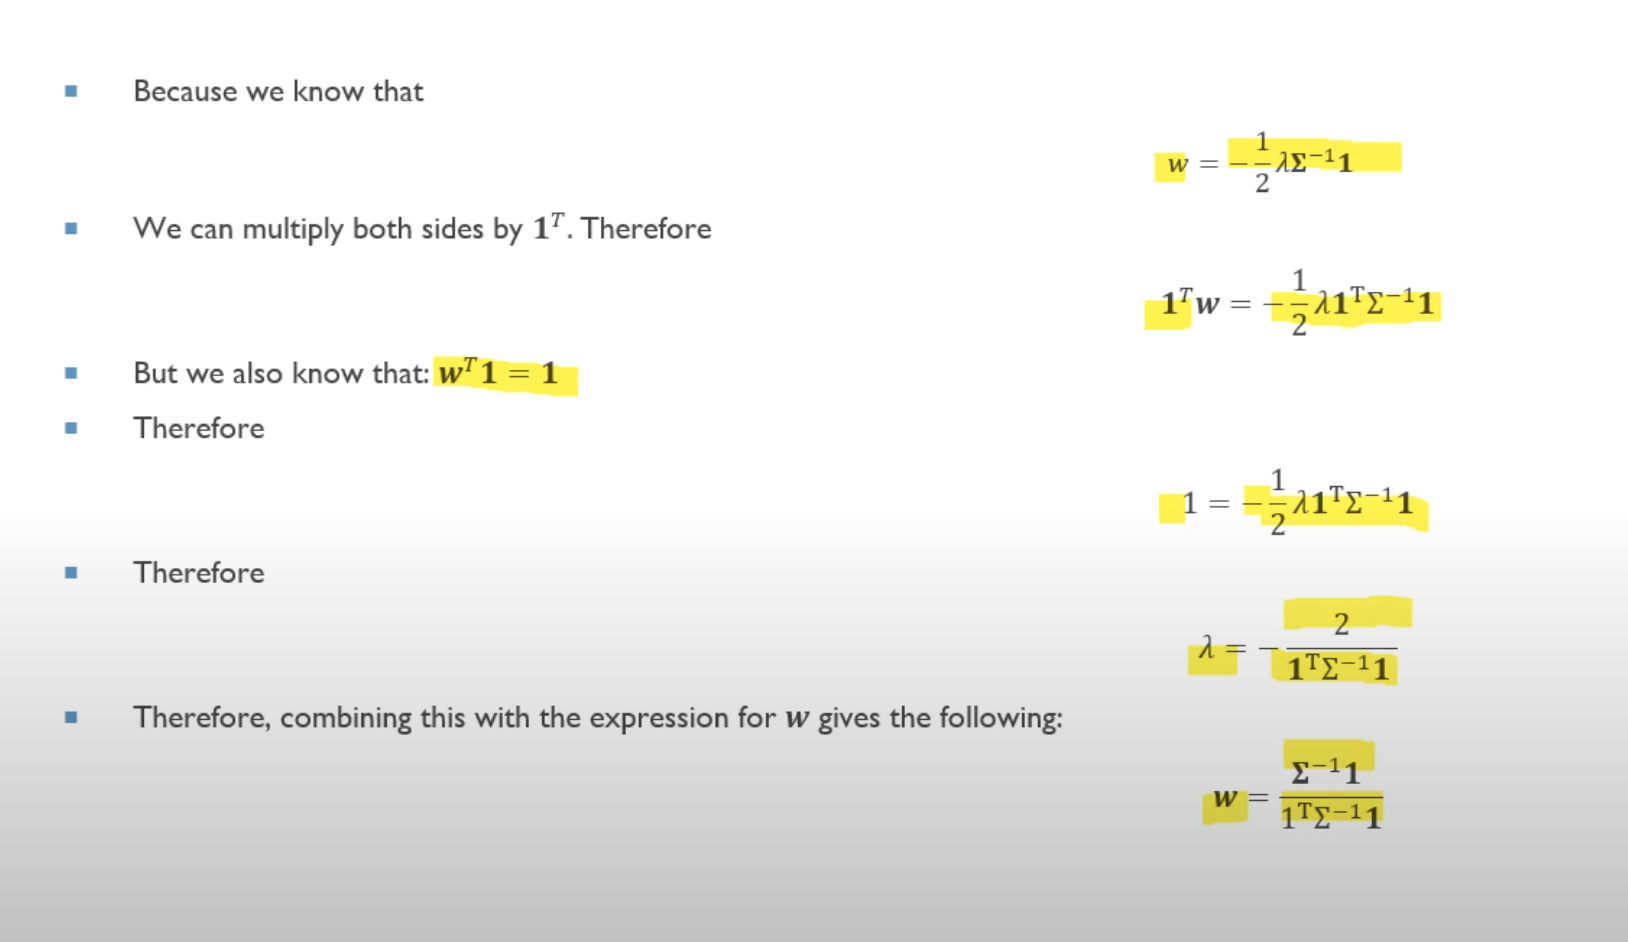

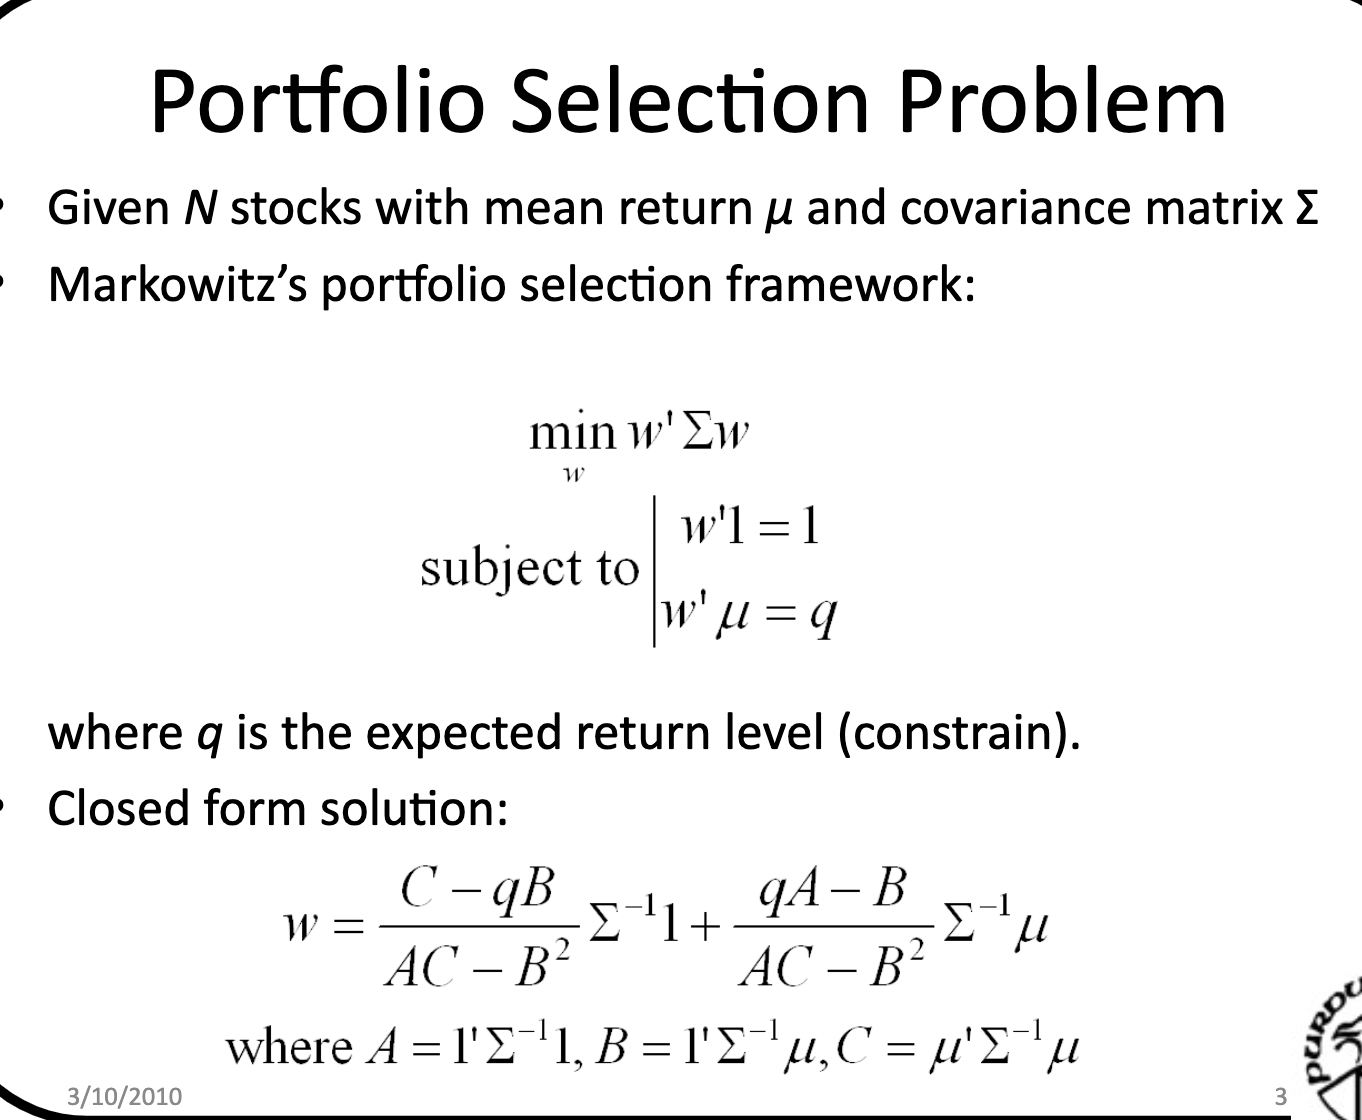

In [237]:
def mv_close(num_arr,sol,X,q = 0.015):
    A = np.matmul(np.matmul(num_arr,sol),num_arr)
    A

    mu = np.asarray(X.mean())

    B = np.matmul(np.matmul(num_arr,sol),mu)
    B

    C = np.matmul(np.matmul(mu,sol),mu)
    C
    w_1 = (C-(q*B))/((A*C)-B**2) * np.matmul(sol,num_arr)
    
    w_1

    w_2 = ((q*A)-B)/((A*C)-B**2) * np.matmul(sol,mu)
    w_2

    w = w_1+w_2
    return w




In [238]:
lst = list()
for i in range(7,40):
    q = i/100
    w = mv_close(num_arr,sol,X,q=q)
    cov = np.linalg.inv(sol)
    var = np.matmul(np.matmul(w,cov),w)
    lst.append(var)
    print(q,q/var)

0.07 3.629189503851012
0.08 2.882668320009716
0.09 2.3589130696966976
0.1 1.9805371732672434
0.11 1.6984055797584852
0.12 1.4818658825423225
0.13 1.311429932940492
0.14 1.1743491235720533
0.15 1.0620326355333851
0.16 0.9685270556280502
0.17 0.8896000708086181
0.18 0.8221731215993352
0.19 0.7639604749958191
0.2 0.7132336272551676
0.21 0.6686637971271396
0.22 0.6292142888255233
0.23 0.5940654433516388
0.24 0.5625613432035317
0.25 0.5341713253877337
0.26 0.5084617584931216
0.27 0.4850750532263394
0.28 0.4637138492555986
0.29 0.44412895895312904
0.3 0.42611007370247483
0.31 0.40947852634593107
0.32 0.39408160128757874
0.33 0.3797880217622036
0.34 0.36648434124340334
0.35 0.3540720356424287
0.36 0.3424651433339879
0.37 0.33158833686971684
0.38 0.32137533742500646
0.39 0.31176760328390657


In [239]:
min(lst)

0.01928805313850971

# Maximum Sharpe Ratio

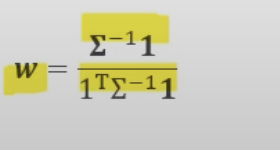

In [240]:
sol.shape

(4, 4)

In [241]:
sol

array([[ 28.03029358,  -6.21845877,  -4.8700492 ,  -8.38563365],
       [ -6.21845877,  26.19565838, -20.55757397,  -7.63357538],
       [ -4.8700492 , -20.55757397, 127.62433834,  -0.        ],
       [ -8.38563365,  -7.63357538,  -0.        , 122.40685551]])

In [242]:
num_arr = np.array([1,1,1,1])

In [243]:
num = np.matmul(sol,mu)
num

array([ 1.80770125, -0.98416028,  3.81682614,  1.9001769 ])

In [248]:
den = np.matmul(num_arr.T,num)

In [249]:
den

6.540544011179613

In [253]:
w = num/den
w

array([ 0.27638393, -0.15047071,  0.58356402,  0.29052276])

In [254]:
sum(num/den)

1.0

In [263]:
np.matmul(w,mu)

0.047091280487917136